In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
train_df = pd.read_csv('data/keqing_train.csv')
test_df = pd.read_csv('data/keqing_test.csv')

train_df.head()

,Lv,Base HP,Base ATK,Base DEF
0,1,1020,25,62
1,20,2646,65,161
2,40,5268,130,321
3,50,6776,167,413
4,60,8500,209,519


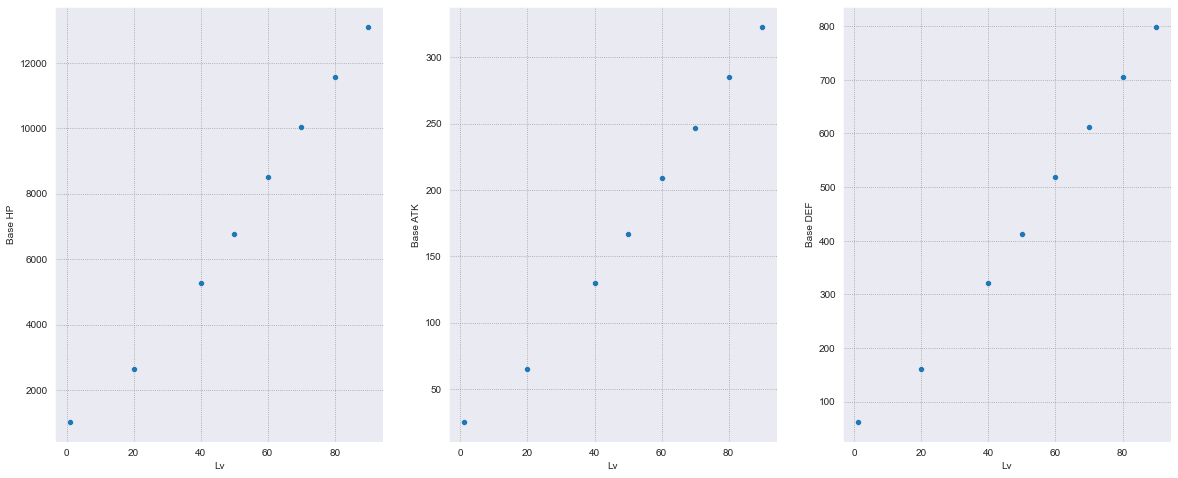

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

sns.scatterplot(x=train_df['Lv'], y=train_df['Base HP'], ax=ax1)
sns.scatterplot(x=train_df['Lv'], y=train_df['Base ATK'], ax=ax2)
sns.scatterplot(x=train_df['Lv'], y=train_df['Base DEF'], ax=ax3)


plt.show()

In [4]:
def HP_model():
  model = tf.keras.Sequential([keras.layers.Dense(1, input_shape=[1])],name='HP_Model')
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(1))
  return model

def ATK_model():
  model = tf.keras.Sequential([keras.layers.Dense(1, input_shape=[1])],name='ATK_Model')
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.05))
  return model

def DEF_model():
  model = tf.keras.Sequential([keras.layers.Dense(1, input_shape=[1])],name='DEF_Model')
  model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.05))
  return model

hp_m = HP_model()
atk_m = ATK_model()
def_m = DEF_model()

In [5]:
hp_his = hp_m.fit(train_df['Lv'], train_df['Base HP'], epochs=900, verbose=0)
atk_his = atk_m.fit(train_df['Lv'], train_df['Base ATK'], epochs=900, verbose=0)
def_his = def_m.fit(train_df['Lv'], train_df['Base DEF'], epochs=900, verbose=0)

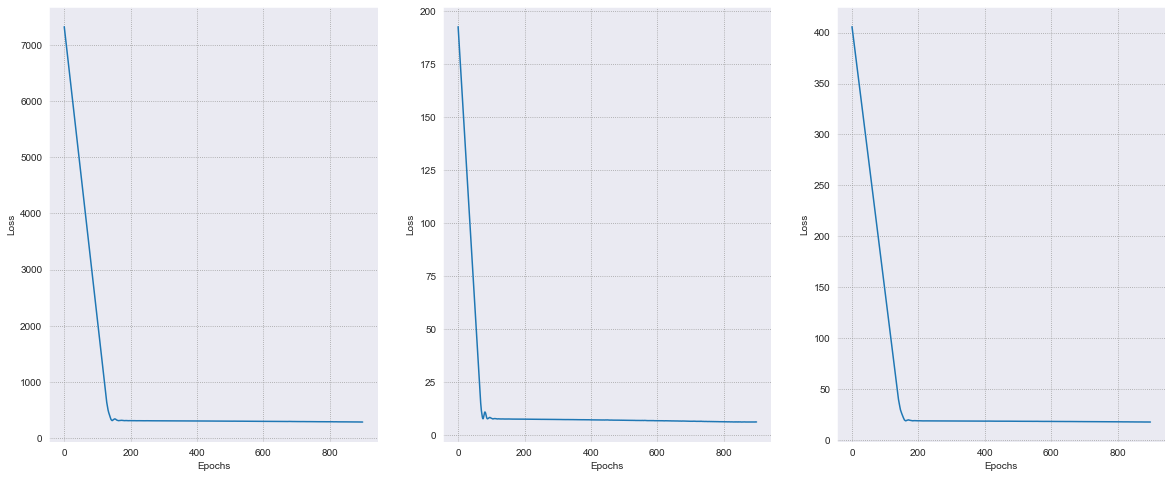

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

ax1.plot(hp_his.history['loss'])
ax2.plot(atk_his.history['loss'])
ax3.plot(def_his.history['loss'])

ax1.set_xlabel('Epochs'), ax2.set_xlabel('Epochs'), ax3.set_xlabel('Epochs')
ax1.set_ylabel('Loss'), ax2.set_ylabel('Loss'), ax3.set_ylabel('Loss')

plt.show()

In [7]:
result = {}

result['hp_prediction'] = hp_m.predict(test_df['Lv'])
result['atk_prediction'] = atk_m.predict(test_df['Lv'])
result['def_prediction'] = def_m.predict(test_df['Lv'])

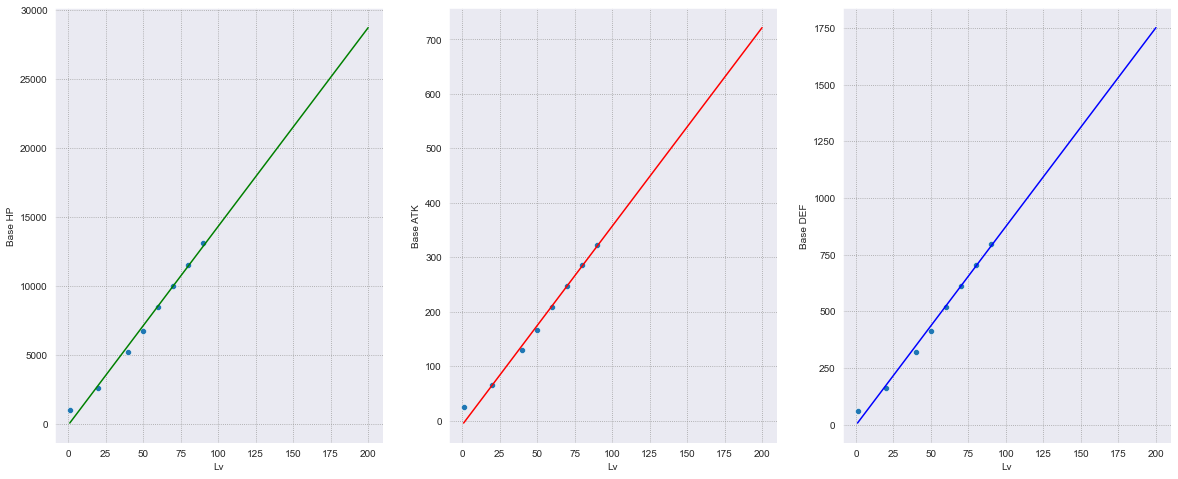

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))

sns.scatterplot(x=test_df['Lv'], y=test_df['Base HP'], ax=ax1)
ax1.plot(test_df['Lv'], result['hp_prediction'], color='g')

sns.scatterplot(x=test_df['Lv'], y=test_df['Base ATK'], ax=ax2)
ax2.plot(test_df['Lv'], result['atk_prediction'], color='r')

sns.scatterplot(x=test_df['Lv'], y=test_df['Base DEF'], ax=ax3)
ax3.plot(test_df['Lv'], result['def_prediction'], color='b')

plt.show()